# Sect 31-Pt2 & 32: Intro to Time Series

- From 12/19/19  study group

## Learning Objectives:
- `pd.grouper`

- Learn about types of time series trends and how to remove them.
- Learn about seasonal decomposition`statsmodels.tsa.seasonal.seasonal_decompose`

- Learn about PACF, ACF
- Introduce ARIMA and SARIMA models.



 ## Questions to Revisit
 - Can you interpolate between missing datapoints?
     - `pd.Series.interpolate` 
     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html
 

## References

- [Pandas Timeseries Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
- ['Timeseries Offset Aliases'](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
- [Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

**REFERENCE CONTENTS:**
- Date StrFormatting
    - Used for:
        - Recognizing Date Formats (`pd.to_datetime`)
        - `dt_obj.strftime()`
        
- Pandas Frequency Aliases
    - Used for:
        - `df.resample()`
        - `df.asfreq()`
        - ...
        

### Date Str Formatting




Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

### Pandas Frequency Aliases


https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

|Alias	| Description|
| --- | --- |
|B |	business day frequency|
|C |	custom business day frequency|
|D |	calendar day frequency|
|W |	weekly frequency|
|M |	month end frequency|
|SM |	semi-month end frequency (15th and end of month)|
|BM |	business month end frequency|
|CBM |	custom business month end frequency|
|MS |	month start frequency|
|SMS |	semi-month start frequency (1st and 15th)|
|BMS |	business month start frequency|
|CBMS |	custom business month start frequency|
|Q |	quarter end frequency|
|BQ |	business quarter end frequency|
|QS |	quarter start frequency|
|BQS |	business quarter start frequency|
|A, Y |	year end frequency|
|BA, BY |	business year end frequency|
|AS, YS |	year start frequency|
|BAS, BYS |	business year start frequency|
|BH | business hour frequency|
|H | hourly frequency|
|T |  min	minutely frequency|
|S | secondly frequency|
|L |  ms	milliseconds|
|U |  us	microseconds|
|N | nanoseconds|

# Intro to Time Series

In [1]:
!pip install -U fsds_100719
# !pip install -U scikit-learn

from fsds_100719.imports import *

fsds_1007219  v0.5.12 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
## Lab Function
def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    dfoutput['sig'] = dfoutput['p-value']<.05
    print (dfoutput)
    
    return dfoutput

## Baltimore Crime

In [3]:
baltimore_crime ="https://raw.githubusercontent.com/jirvingphd/fsds_100719/master/fsds_100719/data/BPD_Part_1_Victim_Based_Crime_Data.csv"
df = pd.read_csv(baltimore_crime,low_memory=False,
                 parse_dates=["CrimeDate","CrimeTime"])#,
#                 index_col='CrimeDate')
display(df.head())
mpl.rcParams['figure.figsize']= (12,8)
df.index

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,2019-12-14,2019-12-20 00:26:00,1A,2400 W BELVEDERE AV,HOMICIDE,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,39.0,NaN,HOSPITAL,NaN,1
1,2019-12-14,2019-12-20 07:30:00,3B,600 S MONROE ST,ROBBERY - STREET,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,39.0,NaN,STREET,NaN,1
2,2019-12-14,2019-12-20 14:30:00,3JK,3000 E MONUMENT ST,ROBBERY - RESIDENCE,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,2019-12-14,2019-12-20 14:15:00,4A,1100 MCCULLOH ST,AGG. ASSAULT,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,39.0,NaN,STREET,NaN,1
4,2019-12-14,2019-12-20 04:03:00,5E,400 E BELVEDERE AVE,BURGLARY,O,NaN,523,NORTHERN,ROSEBANK,-77.0,39.0,NaN,OTHER - OUTSIDE,NaN,1


RangeIndex(start=0, stop=286609, step=1)

In [4]:
df['datetime'] =df['CrimeDate'] #'CrimeTime'].copy()
df.set_index('datetime',inplace=True)
df.sort_index(inplace=True)
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
datetime,,,,,,,,,,,,,,,,
1963-10-30,1963-10-30,2019-12-20 00:00:00,2A,3100 FERNDALE AVE,RAPE,I,OTHER,622,NORTHWEST,HOWARD PARK,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
1969-07-20,1969-07-20,2019-12-20 21:00:00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534,NORTHERN,ROLAND PARK,-77.0,39.0,NaN,NaN,NaN,1
1975-06-01,1975-06-01,2019-12-20 00:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822,SOUTHWEST,UPLANDS,-77.0,39.0,NaN,OTHER - INSIDE,NaN,1
1977-05-01,1977-05-01,2019-12-20 00:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531,NORTHERN,WYMAN PARK,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
1978-01-01,1978-01-01,2019-12-20 10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-14,2019-12-14,2019-12-20 01:05:00,4E,300 S CHARLES ST,COMMON ASSAULT,I,NaN,113,CENTRAL,INNER HARBOR,-77.0,39.0,NaN,HOTEL/MOTEL,NaN,1
2019-12-14,2019-12-14,2019-12-20 10:30:00,4D,3200 N HILTON ST,AGG. ASSAULT,I,HANDS,623,NORTHWEST,FOREST PARK,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2019-12-14,2019-12-14,2019-12-20 00:52:00,6E,1700 N CALHOUN ST,LARCENY,O,NaN,734,WESTERN,SANDTOWN-WINCHESTER,-77.0,39.0,NaN,STREET,Western,1


In [5]:
df.sort_index(inplace=True)
df = df.loc['2014':].copy()
df.index

DatetimeIndex(['2014-01-01', '2014-01-01', '2014-01-01', '2014-01-01',
               '2014-01-01', '2014-01-01', '2014-01-01', '2014-01-01',
               '2014-01-01', '2014-01-01',
               ...
               '2019-12-14', '2019-12-14', '2019-12-14', '2019-12-14',
               '2019-12-14', '2019-12-14', '2019-12-14', '2019-12-14',
               '2019-12-14', '2019-12-14'],
              dtype='datetime64[ns]', name='datetime', length=286528, freq=None)

### Which crimes were the most common?

Text(0.5, 0, 'Number of Crimes')

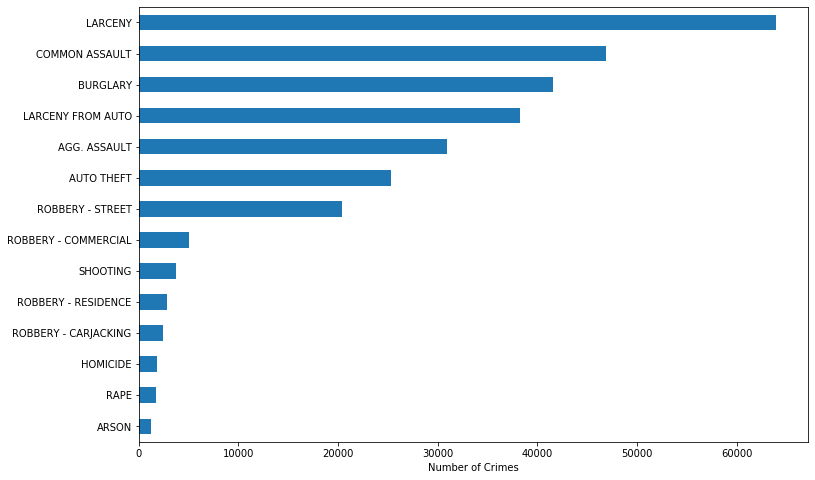

In [6]:
ax=df["Description"].value_counts(ascending=True).plot(kind='barh')
ax.set_xlabel('Number of Crimes')

Text(0.5, 0, 'Portion of Crimes')

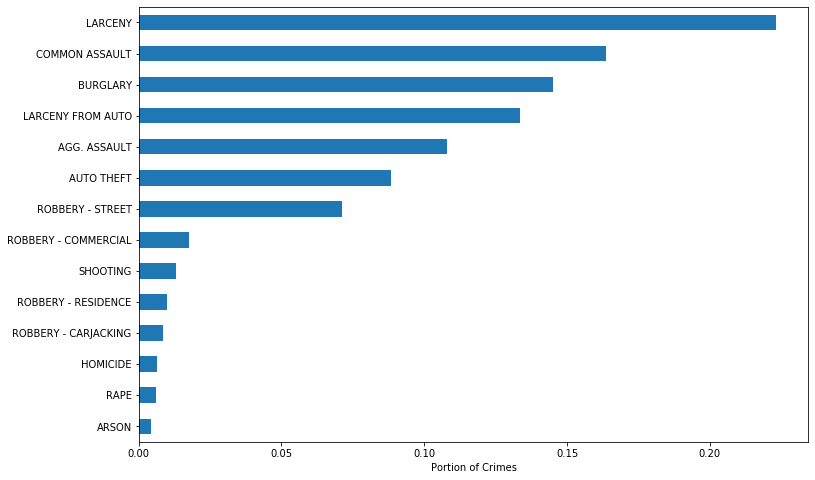

In [7]:
ax=df["Description"].value_counts(ascending=True, normalize=True).plot(kind='barh')
# ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%d.2\%"))
ax.set_xlabel('Portion of Crimes')

In [8]:
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
datetime,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,2019-12-20 02:41:00,4C,OLDHAM ST,AGG. ASSAULT,O,OTHER,NaN,SOUTHEAST,NaN,NaN,NaN,NaN,STREET,NaN,1
2014-01-01,2014-01-01,2019-12-20 02:41:00,4C,OLDHAM ST,AGG. ASSAULT,O,OTHER,NaN,SOUTHEAST,NaN,NaN,NaN,NaN,STREET,NaN,1
2014-01-01,2014-01-01,2019-12-20 06:10:00,3CF,1900 EDMONDSON AV,ROBBERY - COMMERCIAL,I,FIREARM,722,WESTERN,MIDTOWN EDMONDSON,-77.0,39.0,NaN,LIQUOR STORE,NaN,1
2014-01-01,2014-01-01,2019-12-20 10:25:00,4E,3600 COTTAGE AV,COMMON ASSAULT,O,NaN,612,NORTHWEST,PARK CIRCLE,-77.0,39.0,NaN,STREET,NaN,1
2014-01-01,2014-01-01,2019-12-20 05:49:00,4C,1800 W LEXINGTON ST,AGG. ASSAULT,I,OTHER,711,WESTERN,FRANKLIN SQUARE,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1


### Making df_crimes

In [9]:
pd.set_option('display.max_columns',0)

In [10]:
df_crimes = pd.get_dummies(df,columns=['Description'])
df_crimes

,CrimeDate,CrimeTime,CrimeCode,Location,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents,Description_AGG. ASSAULT,Description_ARSON,Description_AUTO THEFT,Description_BURGLARY,Description_COMMON ASSAULT,Description_HOMICIDE,Description_LARCENY,Description_LARCENY FROM AUTO,Description_RAPE,Description_ROBBERY - CARJACKING,Description_ROBBERY - COMMERCIAL,Description_ROBBERY - RESIDENCE,Description_ROBBERY - STREET,Description_SHOOTING
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,2019-12-20 02:41:00,4C,OLDHAM ST,O,OTHER,NaN,SOUTHEAST,NaN,NaN,NaN,NaN,STREET,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01,2014-01-01,2019-12-20 02:41:00,4C,OLDHAM ST,O,OTHER,NaN,SOUTHEAST,NaN,NaN,NaN,NaN,STREET,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01,2014-01-01,2019-12-20 06:10:00,3CF,1900 EDMONDSON AV,I,FIREARM,722,WESTERN,MIDTOWN EDMONDSON,-77.0,39.0,NaN,LIQUOR STORE,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2014-01-01,2014-01-01,2019-12-20 10:25:00,4E,3600 COTTAGE AV,O,NaN,612,NORTHWEST,PARK CIRCLE,-77.0,39.0,NaN,STREET,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2014-01-01,2014-01-01,2019-12-20 05:49:00,4C,1800 W LEXINGTON ST,I,OTHER,711,WESTERN,FRANKLIN SQUARE,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-14,2019-12-14,2019-12-20 01:05:00,4E,300 S CHARLES ST,I,NaN,113,CENTRAL,INNER HARBOR,-77.0,39.0,NaN,HOTEL/MOTEL,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2019-12-14,2019-12-14,2019-12-20 10:30:00,4D,3200 N HILTON ST,I,HANDS,623,NORTHWEST,FOREST PARK,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-12-14,2019-12-14,2019-12-20 00:52:00,6E,1700 N CALHOUN ST,O,NaN,734,WESTERN,SANDTOWN-WINCHESTER,-77.0,39.0,NaN,STREET,Western,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


___

In [11]:
crime_cols = [col for col in df_crimes.columns if 'Description_' in col]
crime_cols

['Description_AGG. ASSAULT',
 'Description_ARSON',
 'Description_AUTO THEFT',
 'Description_BURGLARY',
 'Description_COMMON ASSAULT',
 'Description_HOMICIDE',
 'Description_LARCENY',
 'Description_LARCENY FROM AUTO',
 'Description_RAPE',
 'Description_ROBBERY - CARJACKING',
 'Description_ROBBERY - COMMERCIAL',
 'Description_ROBBERY - RESIDENCE',
 'Description_ROBBERY - STREET',
 'Description_SHOOTING']

In [12]:
new_names = [x.replace('Description_','') for x in crime_cols]
new_names

['AGG. ASSAULT',
 'ARSON',
 'AUTO THEFT',
 'BURGLARY',
 'COMMON ASSAULT',
 'HOMICIDE',
 'LARCENY',
 'LARCENY FROM AUTO',
 'RAPE',
 'ROBBERY - CARJACKING',
 'ROBBERY - COMMERCIAL',
 'ROBBERY - RESIDENCE',
 'ROBBERY - STREET',
 'SHOOTING']

In [13]:
df_crimes.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Inside/Outside',
       'Weapon', 'Post', 'District', 'Neighborhood', 'Longitude', 'Latitude',
       'Location 1', 'Premise', 'vri_name1', 'Total Incidents',
       'Description_AGG. ASSAULT', 'Description_ARSON',
       'Description_AUTO THEFT', 'Description_BURGLARY',
       'Description_COMMON ASSAULT', 'Description_HOMICIDE',
       'Description_LARCENY', 'Description_LARCENY FROM AUTO',
       'Description_RAPE', 'Description_ROBBERY - CARJACKING',
       'Description_ROBBERY - COMMERCIAL', 'Description_ROBBERY - RESIDENCE',
       'Description_ROBBERY - STREET', 'Description_SHOOTING'],
      dtype='object')

In [14]:
rename_dict = dict(zip(crime_cols,new_names))
rename_dict

{'Description_AGG. ASSAULT': 'AGG. ASSAULT',
 'Description_ARSON': 'ARSON',
 'Description_AUTO THEFT': 'AUTO THEFT',
 'Description_BURGLARY': 'BURGLARY',
 'Description_COMMON ASSAULT': 'COMMON ASSAULT',
 'Description_HOMICIDE': 'HOMICIDE',
 'Description_LARCENY': 'LARCENY',
 'Description_LARCENY FROM AUTO': 'LARCENY FROM AUTO',
 'Description_RAPE': 'RAPE',
 'Description_ROBBERY - CARJACKING': 'ROBBERY - CARJACKING',
 'Description_ROBBERY - COMMERCIAL': 'ROBBERY - COMMERCIAL',
 'Description_ROBBERY - RESIDENCE': 'ROBBERY - RESIDENCE',
 'Description_ROBBERY - STREET': 'ROBBERY - STREET',
 'Description_SHOOTING': 'SHOOTING'}

In [15]:
df_crimes.rename(rename_dict,axis=1,inplace=True)
df_crimes

,CrimeDate,CrimeTime,CrimeCode,Location,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents,AGG. ASSAULT,ARSON,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,ROBBERY - STREET,SHOOTING
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,2019-12-20 02:41:00,4C,OLDHAM ST,O,OTHER,NaN,SOUTHEAST,NaN,NaN,NaN,NaN,STREET,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01,2014-01-01,2019-12-20 02:41:00,4C,OLDHAM ST,O,OTHER,NaN,SOUTHEAST,NaN,NaN,NaN,NaN,STREET,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01,2014-01-01,2019-12-20 06:10:00,3CF,1900 EDMONDSON AV,I,FIREARM,722,WESTERN,MIDTOWN EDMONDSON,-77.0,39.0,NaN,LIQUOR STORE,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2014-01-01,2014-01-01,2019-12-20 10:25:00,4E,3600 COTTAGE AV,O,NaN,612,NORTHWEST,PARK CIRCLE,-77.0,39.0,NaN,STREET,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2014-01-01,2014-01-01,2019-12-20 05:49:00,4C,1800 W LEXINGTON ST,I,OTHER,711,WESTERN,FRANKLIN SQUARE,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-14,2019-12-14,2019-12-20 01:05:00,4E,300 S CHARLES ST,I,NaN,113,CENTRAL,INNER HARBOR,-77.0,39.0,NaN,HOTEL/MOTEL,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2019-12-14,2019-12-14,2019-12-20 10:30:00,4D,3200 N HILTON ST,I,HANDS,623,NORTHWEST,FOREST PARK,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-12-14,2019-12-14,2019-12-20 00:52:00,6E,1700 N CALHOUN ST,O,NaN,734,WESTERN,SANDTOWN-WINCHESTER,-77.0,39.0,NaN,STREET,Western,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [16]:
df_crimes

,CrimeDate,CrimeTime,CrimeCode,Location,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents,AGG. ASSAULT,ARSON,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,ROBBERY - STREET,SHOOTING
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,2019-12-20 02:41:00,4C,OLDHAM ST,O,OTHER,NaN,SOUTHEAST,NaN,NaN,NaN,NaN,STREET,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01,2014-01-01,2019-12-20 02:41:00,4C,OLDHAM ST,O,OTHER,NaN,SOUTHEAST,NaN,NaN,NaN,NaN,STREET,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01,2014-01-01,2019-12-20 06:10:00,3CF,1900 EDMONDSON AV,I,FIREARM,722,WESTERN,MIDTOWN EDMONDSON,-77.0,39.0,NaN,LIQUOR STORE,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2014-01-01,2014-01-01,2019-12-20 10:25:00,4E,3600 COTTAGE AV,O,NaN,612,NORTHWEST,PARK CIRCLE,-77.0,39.0,NaN,STREET,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2014-01-01,2014-01-01,2019-12-20 05:49:00,4C,1800 W LEXINGTON ST,I,OTHER,711,WESTERN,FRANKLIN SQUARE,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-14,2019-12-14,2019-12-20 01:05:00,4E,300 S CHARLES ST,I,NaN,113,CENTRAL,INNER HARBOR,-77.0,39.0,NaN,HOTEL/MOTEL,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2019-12-14,2019-12-14,2019-12-20 10:30:00,4D,3200 N HILTON ST,I,HANDS,623,NORTHWEST,FOREST PARK,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-12-14,2019-12-14,2019-12-20 00:52:00,6E,1700 N CALHOUN ST,O,NaN,734,WESTERN,SANDTOWN-WINCHESTER,-77.0,39.0,NaN,STREET,Western,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [17]:
# df_crimes['datetime'] = df_crimes['CrimeDate'].copy()
# df_crimes.set_index('datetime',inplace=True)
# df_crimes

### Visualize then Get Counts

In [18]:
keep_cols = ['CrimeDate','CrimeTime']
keep_cols.extend(new_names)
keep_cols

['CrimeDate',
 'CrimeTime',
 'AGG. ASSAULT',
 'ARSON',
 'AUTO THEFT',
 'BURGLARY',
 'COMMON ASSAULT',
 'HOMICIDE',
 'LARCENY',
 'LARCENY FROM AUTO',
 'RAPE',
 'ROBBERY - CARJACKING',
 'ROBBERY - COMMERCIAL',
 'ROBBERY - RESIDENCE',
 'ROBBERY - STREET',
 'SHOOTING']

In [19]:
df_crimes = df_crimes[keep_cols].copy()
df_crimes

,CrimeDate,CrimeTime,AGG. ASSAULT,ARSON,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,ROBBERY - STREET,SHOOTING
datetime,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,2019-12-20 02:41:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01,2014-01-01,2019-12-20 02:41:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01,2014-01-01,2019-12-20 06:10:00,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2014-01-01,2014-01-01,2019-12-20 10:25:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2014-01-01,2014-01-01,2019-12-20 05:49:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-14,2019-12-14,2019-12-20 01:05:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2019-12-14,2019-12-14,2019-12-20 10:30:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-12-14,2019-12-14,2019-12-20 00:52:00,0,0,0,0,0,0,1,0,0,0,0,0,0,0


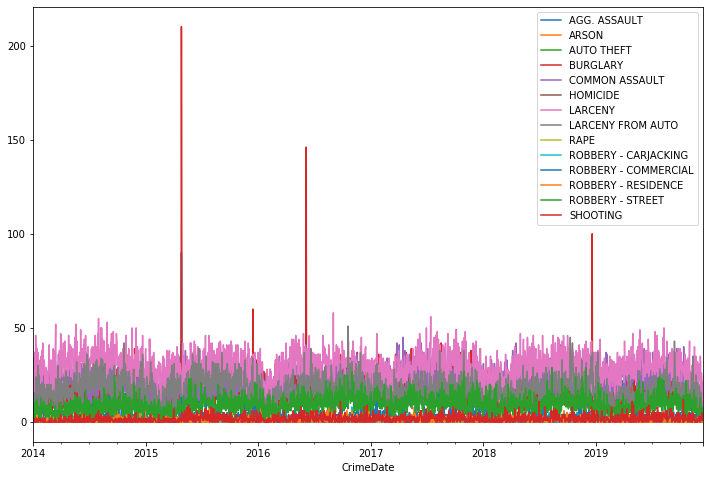

In [20]:
df_crimes.groupby('CrimeDate')[new_names].sum().plot()

### Using `pd.Grouper`

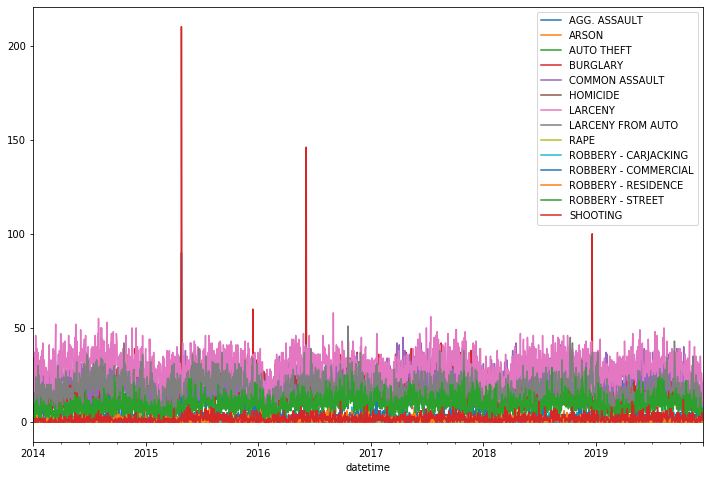

In [21]:
df_crimes.groupby(pd.Grouper(freq='D')).sum().plot()

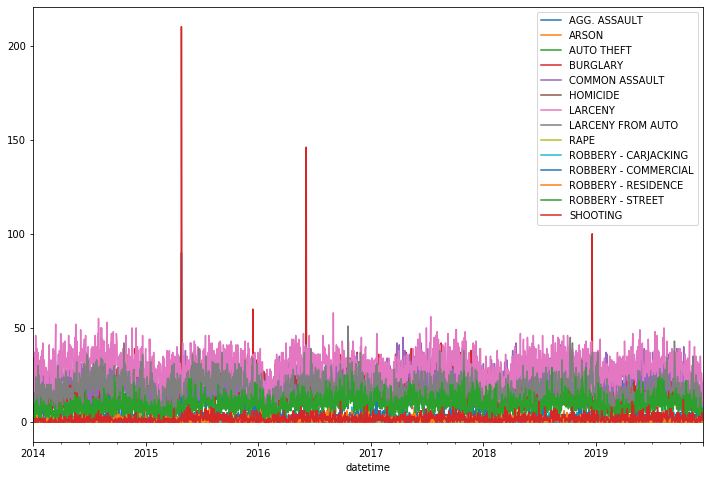

In [22]:
df_counts = df_crimes.groupby(pd.Grouper(freq='D')).sum()
df_counts.plot()

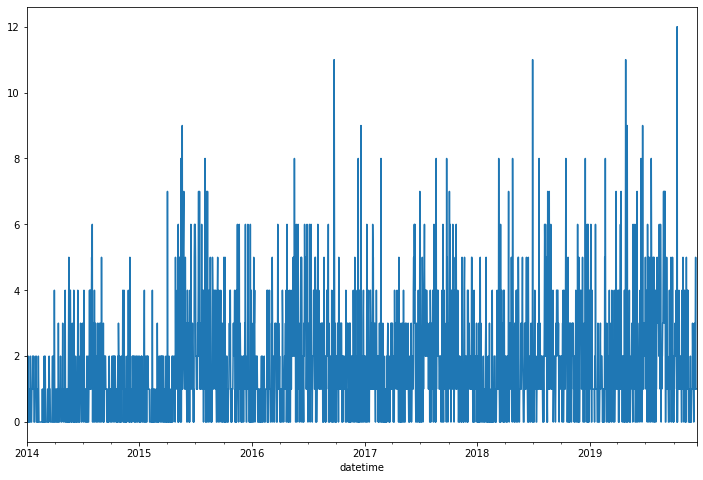

In [23]:
df_counts['SHOOTING'].plot()

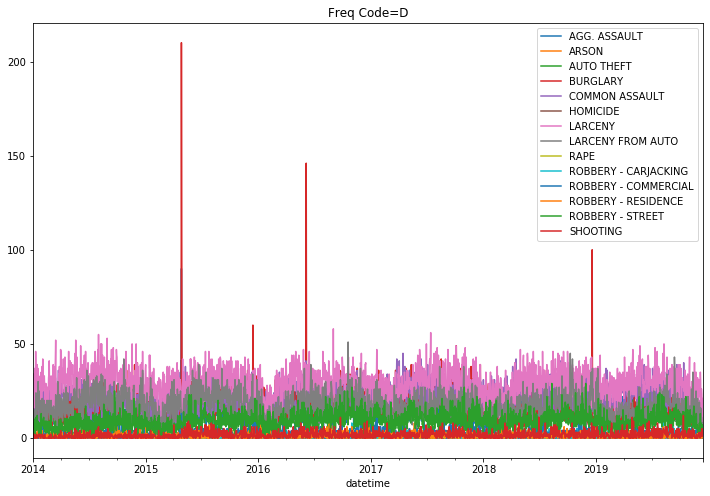

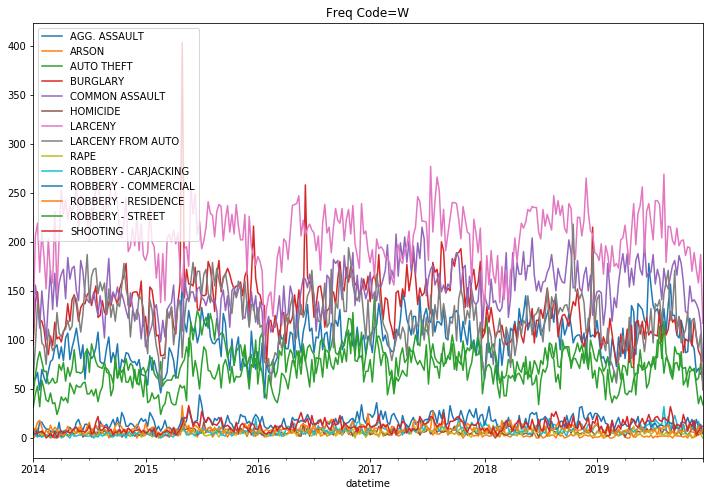

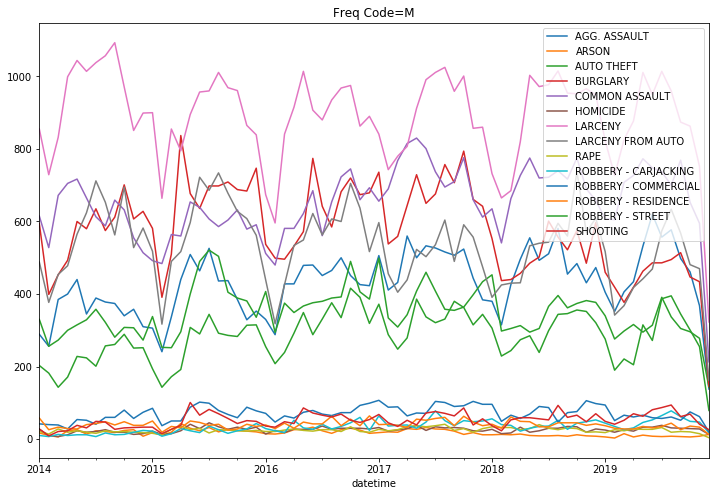

In [24]:
for freq_code in ['D','W','M']:
    ax= df_crimes.groupby(pd.Grouper(freq=freq_code)).sum().plot()
    ax.set_title(f"Freq Code={freq_code}")
#     ax.legend(None)
    

### Working with df_counts


In [27]:
df_counts.to_csv('datasets/baltimore_crime_counts_2014-2019.csv')
df_counts = pd.read_csv('datasets/baltimore_crime_counts_2014-2019.csv',parse_dates=True, index_col='datetime')
df_counts

,AGG. ASSAULT,ARSON,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,ROBBERY - STREET,SHOOTING
datetime,,,,,,,,,,,,,,
2014-01-01,22,0,9,20,19,2,34,15,3,0,2,1,8,2
2014-01-02,6,0,7,28,23,3,26,10,0,1,1,1,4,0
2014-01-03,11,0,3,13,17,1,16,6,0,0,1,1,2,1
2014-01-04,14,0,14,20,23,0,23,15,0,0,1,1,7,0
2014-01-05,9,0,11,14,22,0,19,13,1,2,0,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-10,17,0,9,14,12,1,26,11,0,1,0,5,7,3
2019-12-11,16,0,14,7,15,0,23,7,0,1,0,1,4,5
2019-12-12,9,1,11,8,18,0,16,7,0,0,1,0,5,1


# Removing Trends 
- .diff()
- np.log
- subtract rolling mean
- seasonal decomposition

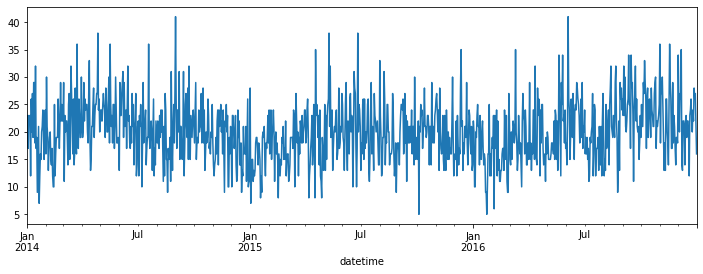

In [28]:
col = 'COMMON ASSAULT'
ts = df_counts[col].copy()
ts.loc['2014':'2016'].plot(figsize=(12,4))#style='.b')

## Seasonal Decomposition

In [29]:
ts=ts.loc['2014':'2016']

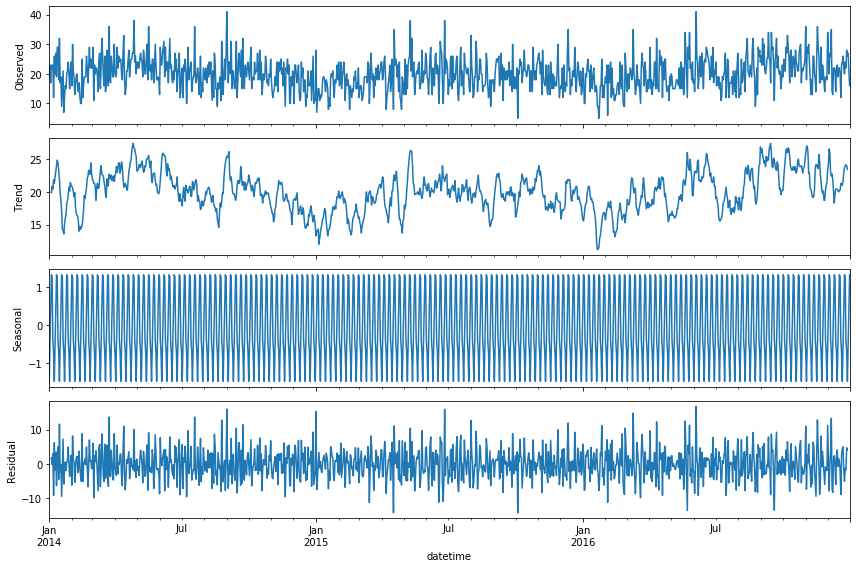

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts)#,model='mul')
decomp.plot();

In [31]:
trend = decomp.trend
residuals = decomp.resid
seasonal = decomp.seasonal

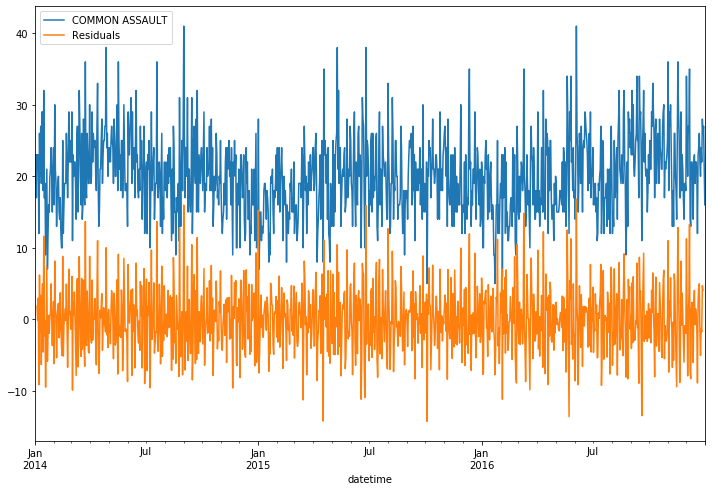

In [32]:
ts.plot()
residuals.plot(label='Residuals')
plt.legend()

In [33]:
fs.ihelp(stationarity_check,False)

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    dfoutput['sig'] = dfoutput['p-value']<.05
    print (dfoutput)
    
    return dfoutput

```

In [34]:
from statsmodels.tsa.stattools import adfuller
adfuller()

TypeError: adfuller() missing 1 required positional argument: 'x'

In [ ]:
stationarity_check(ts);

In [35]:
ts.interpolate(method='time',inplace=True)
decomp = seasonal_decompose(ts)


Results of Dickey-Fuller Test:
Test Statistic                   -3.394182
p-value                           0.011159
#Lags Used                       21.000000
Number of Observations Used    1074.000000
Critical Value (1%)              -3.436453
Critical Value (5%)              -2.864235
Critical Value (10%)             -2.568205
sig                               1.000000
dtype: float64


Test Statistic                   -3.394182
p-value                           0.011159
#Lags Used                       21.000000
Number of Observations Used    1074.000000
Critical Value (1%)              -3.436453
Critical Value (5%)              -2.864235
Critical Value (10%)             -2.568205
sig                               1.000000
dtype: float64

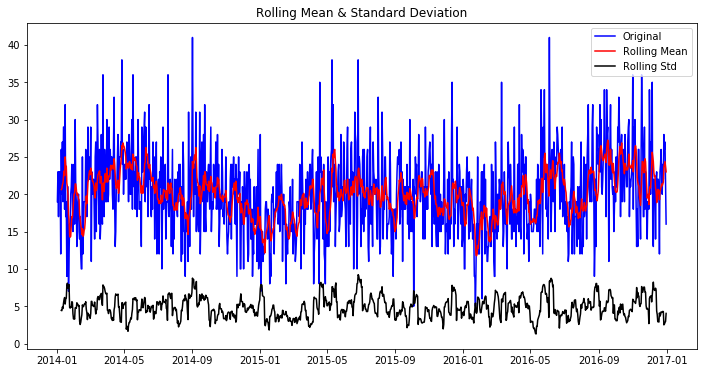

In [36]:
stationarity_check(ts)

Results of Dickey-Fuller Test:
Test Statistic                -1.460858e+01
p-value                        4.057168e-27
#Lags Used                     2.200000e+01
Number of Observations Used    1.067000e+03
Critical Value (1%)           -3.436493e+00
Critical Value (5%)           -2.864253e+00
Critical Value (10%)          -2.568214e+00
sig                            1.000000e+00
dtype: float64


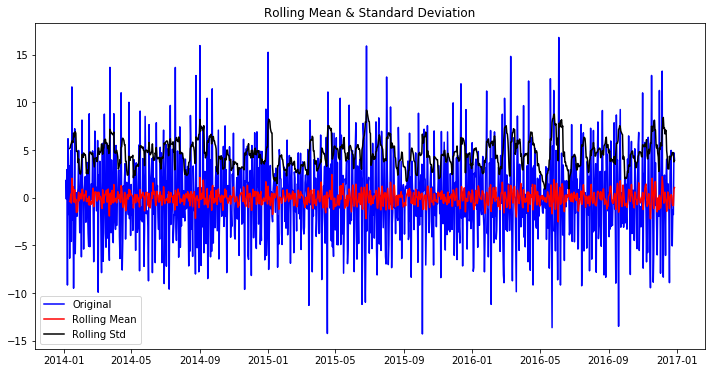

In [37]:
stationarity_check(decomp.resid.dropna());

- .diff()
- np.log
- subtract rolling mean
- seasonal decomposition

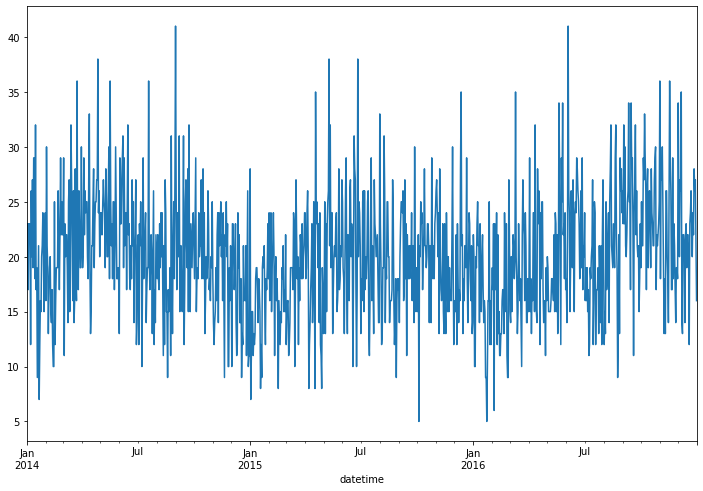

In [38]:
ts.plot()

In [39]:

# plt.plot(np.log(ts))

# ACF & PACF

Text(0.5, 0, 'Number Lag')

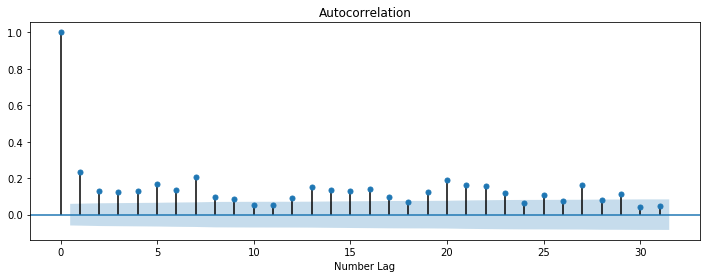

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
mpl.rcParams['figure.figsize'] = (12,4)
plot_acf(ts);
plt.xlabel("Number Lag")
# fig=ax.get_figure()

# fig.set_size_inches(12,4)
# fig


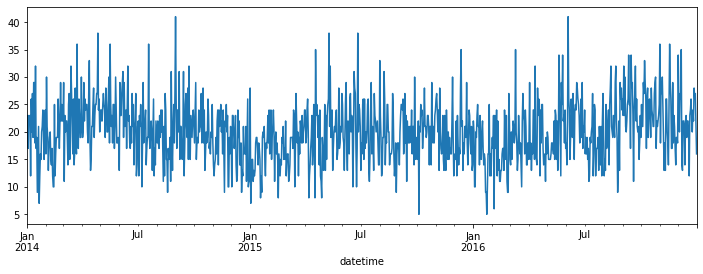

In [41]:

ts.plot()

#  ARIMA/SARIMA
- SEE `sect_32_time_series_models.ipynb`

# HOUSING DATA FROM LAST CLASS

In [ ]:
df = fs.datasets.load_mod1_proj()
df.head()

In [ ]:
df.info()

In [ ]:
date = pd.to_datetime(df['date'])
date

In [ ]:
df['d_date'] = pd.to_datetime(df['date'])
display(df.head())
df.dtypes

In [ ]:
df.set_index('d_date',inplace=True)
df.index

In [ ]:
mpl.rcParams['figure.figsize'] = (12,6)

In [ ]:
df['price'].plot()

### Slicing With Time Series

- Make sure you're index is sorted first'
- Feed in 2 dates as strings for slicing.
- Always use .loc when slicing dates

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.loc['2014-05-01':'2015-05-01','price'].plot().autoscale(axis='x',tight=True)

## Time series Frequencies


In [ ]:
df.index

In [ ]:
df.index

In [ ]:
ts = df['price']

In [ ]:
freq_codes = ['D','3D','W','M', 'Q']
for freq in freq_codes:
    plt.figure()
    title=f"Freq Code: {freq}"
    plt.legend()
    ts.resample(freq).mean().plot(title=title)
    
ax = ts.resample('M').mean().plot(kind='bar')

In [ ]:

ts.resample('D').mean().plot()

## Using Datetime objects and apply statemements

In [ ]:
display(df.head())
df.dtypes

In [ ]:
t = df.index.to_series()[0]
display(t)
print(t)

In [ ]:
# help(t.strptime)

In [ ]:
print(t.strftime("%m-%d-%Y"))
print(t.strftime("%T"))

In [ ]:
df.index

In [ ]:
df['month'] = df.index.to_series().apply(lambda x: x.month)
df.head()


In [ ]:
## Let's make a month column to groupby
df['month_int'] = df.index.to_series().apply(lambda x: x.month) #x
df['month_name'] =df.index.to_series().apply(lambda x:x.strftime("%B"))

for col in ['month_int','month_name']:
    display(df[col].value_counts(normalize=True))

In [ ]:
df.index.to_series().apply(lambda x: x.month)

In [ ]:
help(ax.xaxis.set_ticklabels)

In [ ]:
fig = ax.get_figure()

In [ ]:
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(),**{'rotation':45,
                                                    'ha':'right'}) 
# ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator())
fig